In [96]:
import subprocess

In [ ]:
result = subprocess.run("./run_benchmarks.sh", stdout=subprocess.PIPE)

In [ ]:
lsm_tree_benchmarks = {}
rocksdb_benchmarks = {}

def extract_benchmark_and_time(line):
    benchmark = line.split(" ", 1)[1].split(":")[0]
    time = line.split(":")[1][1:].split("[")[0]
    return benchmark, time

for line in result.stdout.decode("utf-8").split("\n"):
    print(line)
    
    if line.startswith("LSM-TREE"):
        benchmark, time = extract_benchmark_and_time(line)
        lsm_tree_benchmarks[benchmark] = int(time)
        
    elif line.startswith("ROCKSDB"):
        benchmark, time = extract_benchmark_and_time(line)
        rocksdb_benchmarks[benchmark] = int(time)
        
print(lsm_tree_benchmarks)
print(rocksdb_benchmarks)

In [86]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 25})

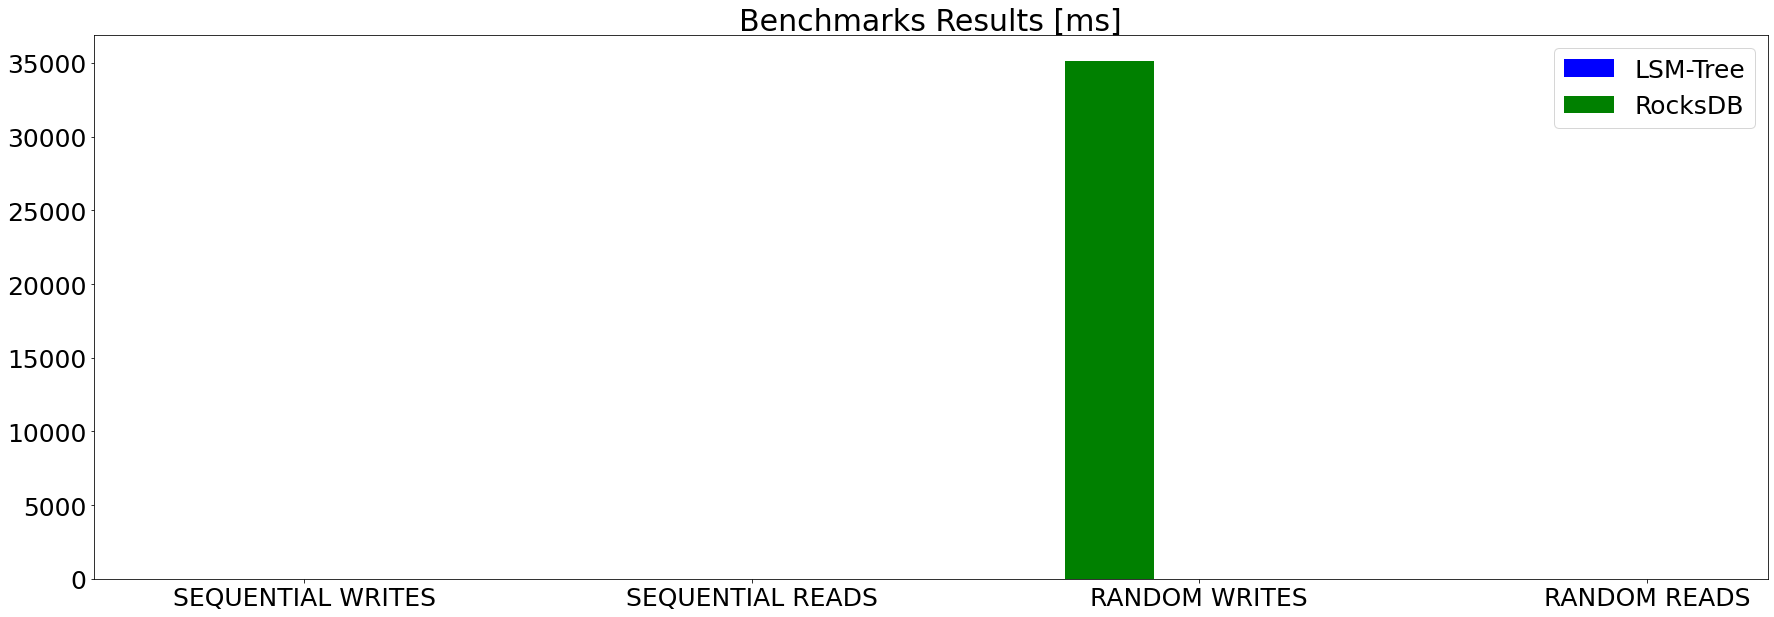

In [98]:
X = np.arange(len(lsm_tree_benchmarks))
ax = plt.subplot(111)
ax.bar(X, lsm_tree_benchmarks.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, rocksdb_benchmarks.values(), width=0.2, color='g', align='center')
ax.legend(('LSM-Tree','RocksDB'))
plt.xticks(X, lsm_tree_benchmarks.keys())
plt.title("Benchmarks Results [ms]", fontsize=30)
plt.show()


For each benchmark, `100 Million` key value pairs have been inserted or retrieved from each database. 
For the sequential benchmarks, they either got written to or read from starting at `{0, 0}` up until `{99999999, 99999999}`.
For the random benchmarks, random numbers have been generated in the interval `[0, 99999999]`, which then have been written to or read from the databases.